In [2]:
#STEP 2: Import Required Libraries 
import tensorflow as tf 
import tensorflow_datasets as tfds 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
!pip install matplotlib

In [6]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached h5py-3.13.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.5.1-cp310-cp310-win_amd64.whl.metadata (22 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2

In [3]:
!pip install tensorflow-datasets

In [3]:
import tensorflow_datasets as tfds

# Set a custom directory for TFDS to store the downloaded data
data_dir = "D:/PLACEMENT/CRANES_DSA/MY_PROGRAM_DATASCIENCE/programming/Food_101_image_classification/tensorflow_datasets"

(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
    data_dir=data_dir  # <-- Use this instead of download_dir
)


In [4]:
#STEP 4: View Dataset Information 
print("Total Classes:", ds_info.features['label'].num_classes )
print("Sample Classes:", ds_info.features['label'].names[:10] )

Total Classes: 101
Sample Classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [5]:
#step 5: Preprocess Image
IMG_SIZE=224
BATCH_SIZE=32
def preprocess(image,label):
    image=tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    image=tf.cast(image,tf.float32)/255.0
    return image,label
#Apply Preprocessing to the datasets
ds_train=ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test=ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

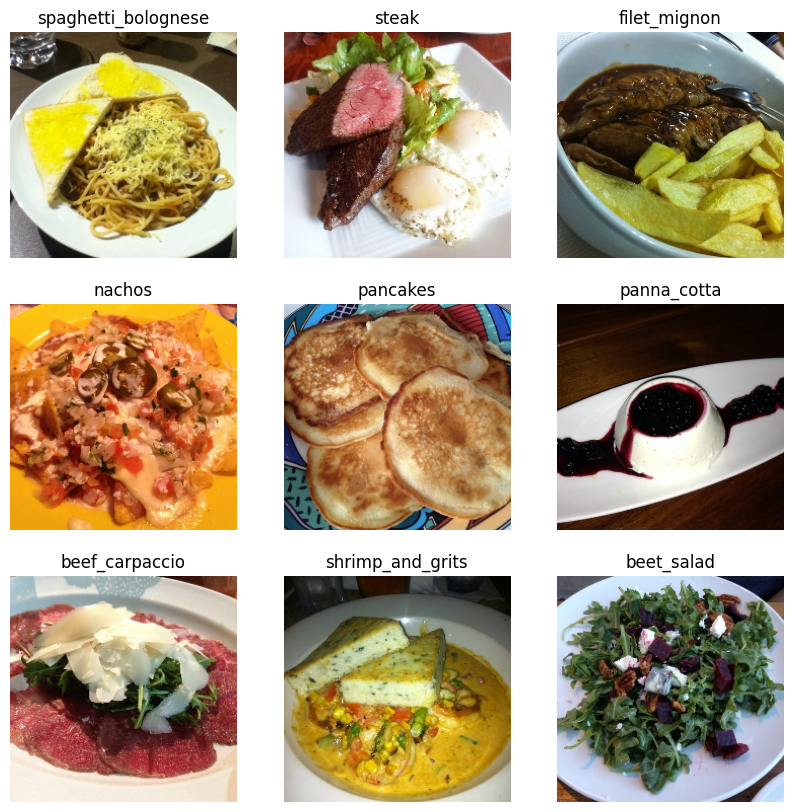

In [6]:
#STEP 6: Visualize Images 
for images, labels in ds_train.take(1): 
    plt.figure(figsize=(10, 10)) 
    for i in range(9): 
        ax= plt.subplot(3, 3, i + 1) 
        plt.imshow(images[i].numpy()) 
        label = ds_info.features ['label'].int2str(labels[i].numpy()) 
        plt.title(label) 
        plt.axis("off") 
plt.show() 

In [7]:
# Step 7: Build the CNN Model using Transfer Learning

# Load the MobileNetV2 base model with pre-trained ImageNet weights
base_model = tf.keras.applications.MobileNetV2(
    input_shape = (224, 224, 3),
    include_top=False,      # Exclude the final classification layer
    weights='imagenet'      # Use pre-trained weights from ImageNet
)

# Freeze the base model layers to prevent them from being trained
base_model.trainable = False

# Build the complete model
model = tf.keras.Sequential([
    base_model,  # Pre-trained MobileNetV2
    tf.keras.layers.GlobalAveragePooling2D(),  # Flatten the feature maps
    tf.keras.layers.Dense(101, activation='softmax')  # Output layer for 101 food categories
])


In [8]:
#STEP 8: Compile the Modet 
model.compile( 
  optimizer='adam',
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy'] 
) 

In [9]:
#STEP 9: Train the Model 
history = model.fit(ds_train, epochs=5, validation_data=ds_test) 

Epoch 1/5
  50/2368 ━━━━━━━━━━━━━━━━━━━━ 7:53 204ms/step - accuracy: 0.0284 - loss: 4.8830

KeyboardInterrupt: 

In [10]:
# STEP 10: Evaluate the Model 
loss, accuracy = model.evaluate(ds_test) 
print("Test Accuracy: (accuracy 100:.2f}%") 

790/790 ━━━━━━━━━━━━━━━━━━━━ 349s 441ms/step - accuracy: 0.1807 - loss: 3.6722
Test Accuracy: (accuracy 100:.2f}%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


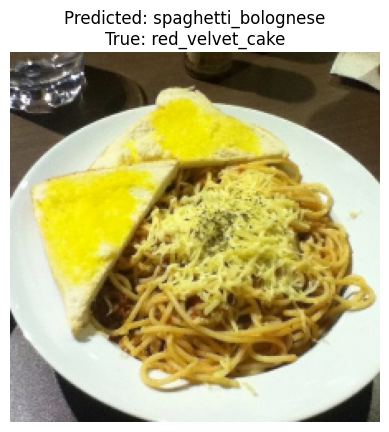

In [11]:
# STEP 11: Make Predictions & Show Results 
class_names = ds_info.features['label'].names 
for inages, labels in ds_test.take(1): 
  image = images[0]
  true_label = class_names[labels[0].numpy()] 
  prediction = model.predict(tf.expand_dims(image, axis=0)) 
  predicted_label = class_names [np.argmax(prediction)] 
  plt.imshow(image) 
  plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}") 
  plt.axis('off') 
  plt.show() 

In [12]:
#STEP 12: Save the Trained Model (Optional) 
model.save("food101_model.h5") # Save to file 
#Saves the trained model in h5 format so you can reuke it later. 